#Importing Libraries

In [1]:

import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torch.utils.data import DataLoader
import random
from PIL import Image
import PIL.ImageOps
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import dataloader
import torchvision.utils
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.optim as optim
import torchsummary as summary
from torch.optim.lr_scheduler import ExponentialLR
from torch.utils.data import DataLoader, Dataset
import joblib
import pickle

#Dataset Creation

In [ ]:
# Set paths
men_wear_folder = '/content/drive/MyDrive/MensWear/Training Dataset'
path_to_save_training_dataset = "/content/drive/MyDrive/MensWear/Training Dataset.csv"

# Function to get class labels
def get_class_labels(data_folder):
    class_labels = os.listdir(data_folder)
    return class_labels

# Get class labels based on sub-folder names
class_labels = get_class_labels(men_wear_folder)
print(class_labels)
# Create a list to hold image paths and corresponding class labels
data = []

# Iterate through each class label and collect image paths
for label in class_labels:
    label_folder = os.path.join(men_wear_folder, label)
    image_files = os.listdir(label_folder)
    label_data = [(os.path.join(label_folder, image), label) for image in image_files]
    data.extend(label_data)

# Create a DataFrame from the collected data
training_df = pd.DataFrame(data, columns=['image_path', 'class_label'])

['Half Sleeves', 'Shorts', 'Caps', 'Footwear', 'Bottoms', 'Full Sleeves']


In [ ]:
class_mapping={}
for i,l in enumerate(class_labels):
  class_mapping[l]=i
training_df['class_label']=training_df['class_label'].map(class_mapping)

In [ ]:
class_mapping

{'Half Sleeves': 0,
 'Shorts': 1,
 'Caps': 2,
 'Footwear': 3,
 'Bottoms': 4,
 'Full Sleeves': 5}

In [ ]:
shuffled_df = training_df.sample(frac=1).reset_index(drop=True)

shuffled_df.to_csv(path_to_save_training_dataset, index=False)

In [ ]:
men_wear_test_folder = '/content/drive/MyDrive/MensWear/Testing Dataset'
path_to_save_testing_dataset = "/content/drive/MyDrive/MensWear/Testing Dataset.csv"

# Function to extract class labels from image filenames
def extract_class_labels(data_folder):
    data = []

    for root, _, files in os.walk(data_folder):
        for file in files:
            class_name = file[0:-5]
            data.append((os.path.join(root, file), class_name))

    return data

# Get image paths and extracted class labels
data = extract_class_labels(men_wear_test_folder)

testing_df = pd.DataFrame(data, columns=['image_path', 'class_label'])
testing_df['class_label']=testing_df['class_label'].map(class_mapping)

# Save the testing dataset as a CSV file
testing_df.to_csv(path_to_save_testing_dataset, index=False)

#Loading Training Dataset

In [2]:
data=pd.read_csv("/content/drive/MyDrive/MensWear/Training Dataset.csv")
data.head(5)

,image_path,class_label
0,/content/drive/MyDrive/MensWear/Training Datas...,3
1,/content/drive/MyDrive/MensWear/Training Datas...,4
2,/content/drive/MyDrive/MensWear/Training Datas...,5
3,/content/drive/MyDrive/MensWear/Training Datas...,2
4,/content/drive/MyDrive/MensWear/Training Datas...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   399 non-null    object
 1   class_label  399 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


#Visualizing Demo Images

In [7]:
visualize={}
class_mapping={0:'Half Sleeves',
 1:'Shorts',
 2:'Caps',
 3:'Footwear',
 4:'Bottoms',
 5:'Full Sleeves'}
for i in range(6):
  class_data = data[data['class_label'] == i]

  # Extract the image paths for the selected class
  image_paths = class_data['image_path'].tolist()

  # Use random.sample to randomly choose 2 image paths
  random_image_paths = random.sample(image_paths, 2)
  visualize[class_mapping[i]]=random_image_paths
visualize

{'Half Sleeves': ['/content/drive/MyDrive/MensWear/Training Dataset/Half Sleeves/Photo14-Angle4.jpg',
  '/content/drive/MyDrive/MensWear/Training Dataset/Half Sleeves/Photo5-Angle2.jpg'],
 'Shorts': ['/content/drive/MyDrive/MensWear/Training Dataset/Shorts/Photo3-Angle2.jpg',
  '/content/drive/MyDrive/MensWear/Training Dataset/Shorts/Photo11-Angle1.jpg'],
 'Caps': ['/content/drive/MyDrive/MensWear/Training Dataset/Caps/Photo13-Angle1.jpg',
  '/content/drive/MyDrive/MensWear/Training Dataset/Caps/Photo8-Angle4.jpg'],
 'Footwear': ['/content/drive/MyDrive/MensWear/Training Dataset/Footwear/Photo14-Angle1.jpg',
  '/content/drive/MyDrive/MensWear/Training Dataset/Footwear/Photo7-Angle2.jpg'],
 'Bottoms': ['/content/drive/MyDrive/MensWear/Training Dataset/Bottoms/Photo7-Angle5.jpg',
  '/content/drive/MyDrive/MensWear/Training Dataset/Bottoms/Photo2-Angle1.jpg'],
 'Full Sleeves': ['/content/drive/MyDrive/MensWear/Training Dataset/Full Sleeves/Photo5-Angle4.jpg',
  '/content/drive/MyDrive/Men

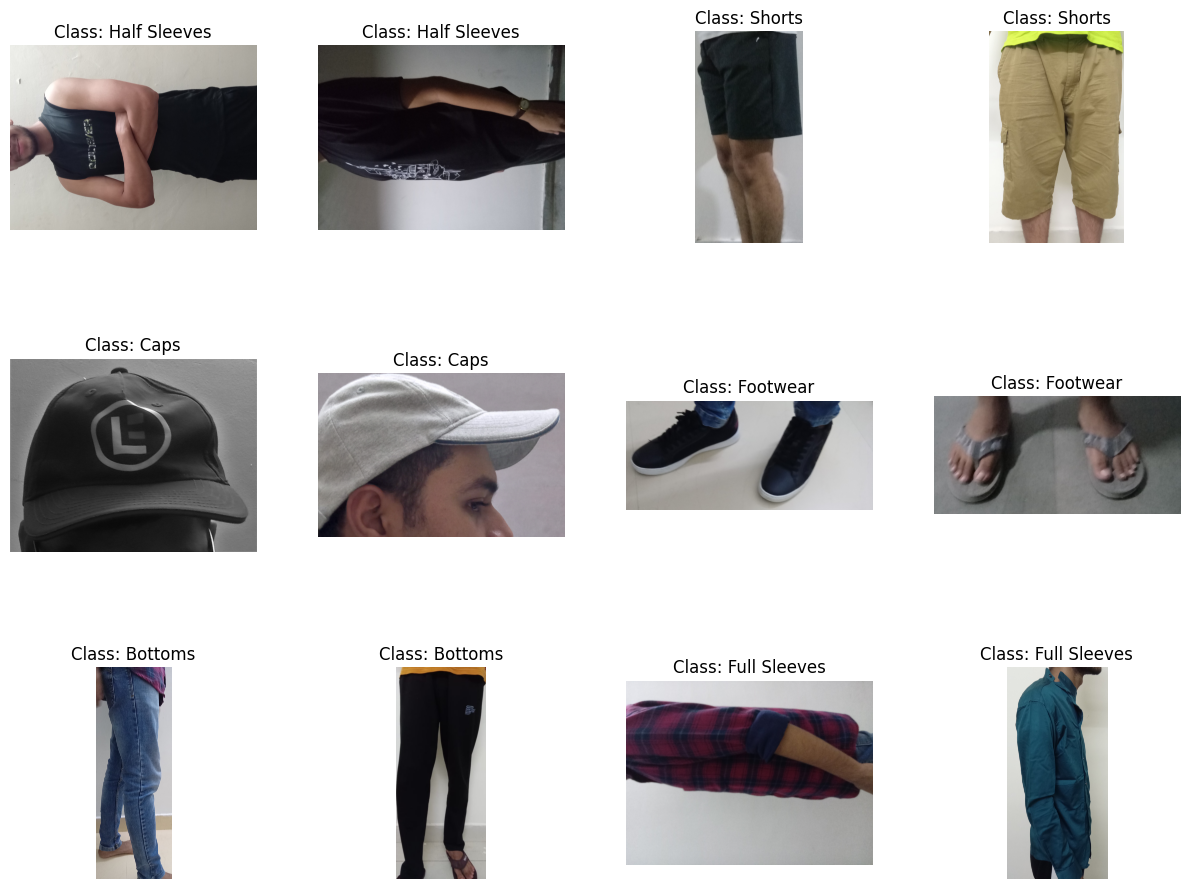

In [15]:
# Create subplots for visualization
fig, axs = plt.subplots(3, 4, figsize=(12, 9))  # 3 rows and 4 columns
axs = axs.ravel()

# Counter to keep track of the images
image_counter = 0

for i, class_label in enumerate(visualize.keys()):
    for j, image_path in enumerate(visualize[class_label]):
        image = plt.imread(image_path)
        axs[image_counter].imshow(image)
        axs[image_counter].set_title(f'Class: {class_label}')
        axs[image_counter].axis('off')
        image_counter += 1

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.25)  # Adjust the spacing between rows and columns

# Show the subplots
plt.show()


#Building CNN Architecture

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=1)
    self.bn1 = nn.BatchNorm2d(num_features=96)
    self.maxpool1 = nn.MaxPool2d(kernel_size=3,stride= 2)
    self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
    self.bn2 = nn.BatchNorm2d(num_features=256)
    self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)
    self.dropout1 = nn.Dropout(p=0.3)
    self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
    self.conv4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2)
    self.dropout2 = nn.Dropout(p=0.3)
    self.fc1= nn.Linear(in_features=43264, out_features=1024)
    self.dropout3 = nn.Dropout(p=0.5)
    self.fc2= nn.Linear(in_features=1024,out_features=128)
    self.fc3= nn.Linear(in_features=128,out_features=36)
    self.fc4= nn.Linear(in_features=36, out_features=6)
    self.relu = nn.ReLU(inplace = True)

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.bn1(x)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.bn2(x)
    x = self.maxpool2(x)
    x = self.dropout1(x)
    x = self.conv3(x)
    x = self.relu(x)
    x = self.conv4(x)
    x = self.relu(x)
    x = self.maxpool3(x)
    x = self.dropout2(x)
    x = x.view(x.size()[0],-1)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout3(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)

    return x

##Creating Custom Dataset and DataLoaders

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Load the image using OpenCV
        image = Image.open(self.df.iloc[idx, 0])

        if self.transform is not None:
            image = self.transform(image)

        label = self.df.iloc[idx, 1]

        return image, torch.tensor(label, dtype=torch.int64)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:
train_dataloader = DataLoader(CustomDataset(data.iloc[0:350], transform=transform),
                        shuffle=True,
                        num_workers=2,
                        batch_size=32)

In [ ]:
val_dataloader = DataLoader(CustomDataset(data.iloc[351:399], transform=transform),
                        shuffle=True,
                        num_workers=2,
                        batch_size=32)

In [ ]:
len(train_dataloader)

11

In [ ]:
len(val_dataloader)

2

In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/MensWear/Testing Dataset.csv")
test_data.head(5)

,image_path,class_label
0,/content/drive/MyDrive/MensWear/Testing Datase...,5
1,/content/drive/MyDrive/MensWear/Testing Datase...,5
2,/content/drive/MyDrive/MensWear/Testing Datase...,3
3,/content/drive/MyDrive/MensWear/Testing Datase...,3
4,/content/drive/MyDrive/MensWear/Testing Datase...,2


In [ ]:
test_dataloader = DataLoader(CustomDataset(test_data, transform=transform),
                        shuffle=False,
                        num_workers=2,
                        batch_size=1)

In [ ]:
len(test_dataloader)

12

# Question 1: Train one model for classification on the training images. Evaluate and report its accuracy on the testing images

In [ ]:
net = CNN().cuda()

# Declare Loss Function
criterion = nn.CrossEntropyLoss()

# Declare Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = ExponentialLR(optimizer, gamma=0.9)


In [ ]:
def train(train_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    net.train()
    for i, data_ in enumerate(train_dataloader, 0):
        img, label = data_
        img ,label = img.cuda(),label.cuda()

        optimizer.zero_grad()
        output = net(img)
        loss_CrossEntropy = criterion(output, label)
        loss_CrossEntropy.backward()
        optimizer.step()
        loss.append(loss_CrossEntropy.item())

    loss = np.array(loss)
    return loss.mean() / len(train_dataloader)


In [ ]:
def validate(val_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    net.eval()
    for i, data_ in enumerate(val_dataloader, 0):
        img, label = data_
        img, label = img.cuda(), label.cuda()

        output = net(img)
        loss_CrossEntropy = criterion(output, label)
        loss.append(loss_CrossEntropy.item())

    loss = np.array(loss)
    return loss.mean() / len(val_dataloader)


In [ ]:
def test(test_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    net.eval()
    for i, data_ in enumerate(test_dataloader, 0):
        img, label = data_
        img, label = img.cuda(), label.cuda()

        output = net(img)
        loss_CrossEntropy = criterion(output, label)
        loss.append(loss_CrossEntropy.item())

    loss = np.array(loss)
    return loss.mean() / len(test_dataloader)


In [ ]:
def calculate_accuracy(output, target):
    _, predicted = torch.max(output, 1)
    correct = (predicted == target).sum().item()
    accuracy = correct / target.size(0)
    return accuracy

In [ ]:
model_dict_path = '/content/drive/MyDrive/MensWear/Classification_Model.pth'
training_acc=[]
training_loss=[]
validation_acc=[]
validation_loss=[]
testing_acc=[]
testing_loss=[]
best_val_loss = 9999
for epoch in range(1,31):
  train_loss = train(train_dataloader)
  training_loss.append(train_loss)
  # Calculate accuracy on the training set
  net.eval()  # Set the model to evaluation mode
  train_accuracy = 0.0
  with torch.no_grad():
      for i, data in enumerate(train_dataloader, 0):
          img, label = data
          img, label = img.cuda(), label.cuda()
          output = net(img)
          train_accuracy += calculate_accuracy(output, label)
  train_accuracy /= len(train_dataloader)
  training_acc.append(train_accuracy)
  # Calculate accuracy on the validation set
  val_loss = 0.0
  val_accuracy = 0.0
  with torch.no_grad():
      for i, data in enumerate(val_dataloader, 0):
          img, label = data
          img, label = img.cuda(), label.cuda()
          output = net(img)
          val_accuracy += calculate_accuracy(output, label)
  val_accuracy /= len(val_dataloader)
  validation_acc.append(val_accuracy)
  val_loss = validate(val_dataloader)
  validation_loss.append(val_loss)
  # Calculate accuracy on the testing set
  test_loss = 0.0
  test_accuracy = 0.0
  with torch.no_grad():
      for i, data in enumerate(test_dataloader, 0):
          img, label = data
          img, label = img.cuda(), label.cuda()
          output = net(img)
          test_accuracy += calculate_accuracy(output, label)
  test_accuracy /= len(test_dataloader)
  testing_acc.append(test_accuracy)
  test_loss = test(test_dataloader)
  testing_loss.append(test_loss)
  print(f"Epoch:{epoch} | Training loss:{train_loss:.4f} | Training accuracy:{train_accuracy:.4f} | Validation loss:{val_loss:.4f}| Validation accuracy:{val_accuracy:.4f} | Testing loss:{test_loss:.4f} | Testing accuracy:{test_accuracy:.4f}")

  if val_loss<best_val_loss:
    best_val_loss = val_loss
    print("-"*10)
    print(f"Best Eval loss{best_val_loss}")
    torch.save(net.state_dict(), model_dict_path)
    print("Model Saved Successfully")



Epoch:1 | Training loss:0.1637 | Training accuracy:0.1337 | Validation loss:0.9050| Validation accuracy:0.0781 | Testing loss:0.1494 | Testing accuracy:0.1667
----------
Best Eval loss0.9049694538116455
Model Saved Successfully
Epoch:2 | Training loss:0.1621 | Training accuracy:0.1769 | Validation loss:0.8989| Validation accuracy:0.1250 | Testing loss:0.1492 | Testing accuracy:0.2500
----------
Best Eval loss0.8989267647266388
Model Saved Successfully
Epoch:3 | Training loss:0.1597 | Training accuracy:0.2973 | Validation loss:0.8907| Validation accuracy:0.2812 | Testing loss:0.1481 | Testing accuracy:0.3333
----------
Best Eval loss0.8907066881656647
Model Saved Successfully
Epoch:4 | Training loss:0.1577 | Training accuracy:0.3189 | Validation loss:0.8743| Validation accuracy:0.1875 | Testing loss:0.1447 | Testing accuracy:0.2500
----------
Best Eval loss0.8743329644203186
Model Saved Successfully
Epoch:5 | Training loss:0.1544 | Training accuracy:0.5180 | Validation loss:0.8543| Vali

###Plotting accuracies and losses

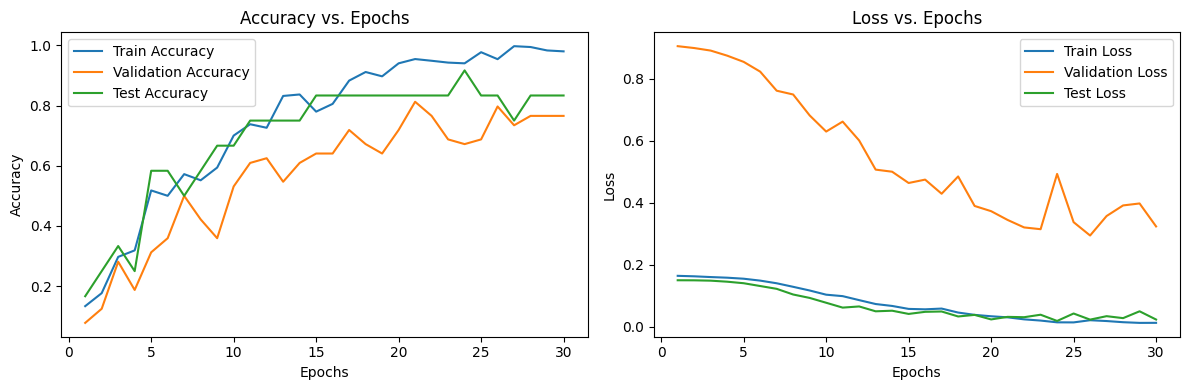

In [ ]:
# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 31), training_acc, label='Train Accuracy')
plt.plot(range(1, 31), validation_acc, label='Validation Accuracy')
plt.plot(range(1, 31), testing_acc, label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 31), training_loss, label='Train Loss')
plt.plot(range(1, 31), validation_loss, label='Validation Loss')
plt.plot(range(1, 31), testing_loss, label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()


###Saving the model

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
classification_model_path='/content/drive/MyDrive/MensWear/Classification_Model.pkl'
model_dict_path = '/content/drive/MyDrive/MensWear/Classification_Model.pth'

model = CNN().to(device)
# Load the saved state dictionary
state_dict = torch.load(model_dict_path)
# Load the state dictionary into the model
model.load_state_dict(state_dict)
with open(classification_model_path, 'wb') as f:
    pickle.dump(model, f)

print("Model saved as .pkl successfully.")

Model saved as .pkl successfully.


###Accuracy on testing dataset

In [ ]:
test_accuracy=0
for i, data in enumerate(test_dataloader, 0):
    img, label = data
    img, label = img.cuda(), label.cuda()
    output = net(img)
    _,predicted = torch.max(output, 1)
    test_accuracy += calculate_accuracy(output, label)
test_accuracy /= len(test_dataloader)
test_accuracy

0.8333333333333334

####Visual Results of model prediction of testing dataset

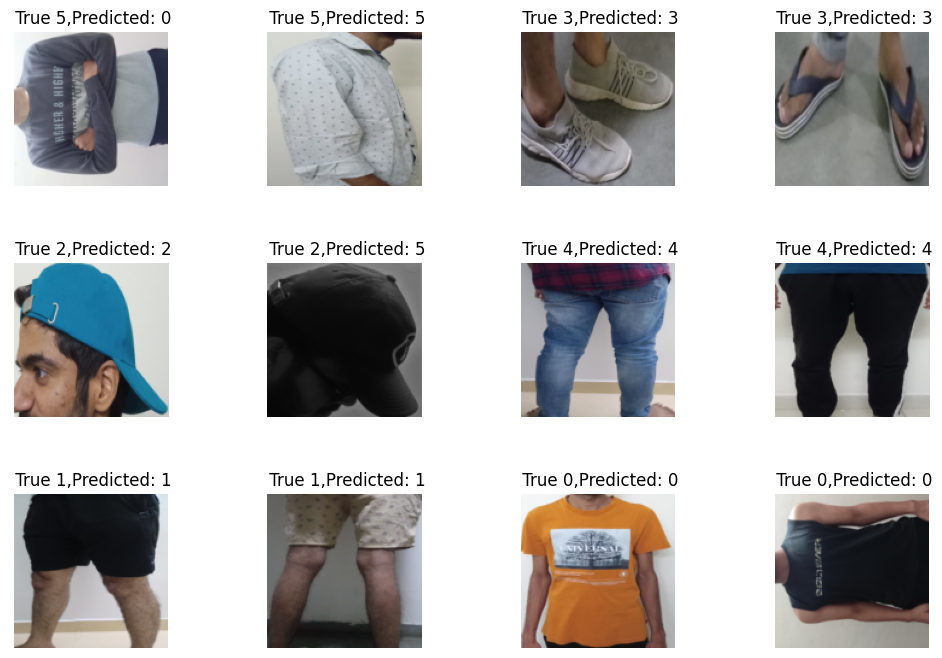

In [ ]:
num_rows, num_cols = 3, 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, data_ in enumerate(test_dataloader):
    img, label = data_
    output = net(img.cuda())
    _,predicted = torch.max(output, 1)

    img_np = img.squeeze().permute(1, 2, 0).numpy()  # Permute the channels to (height, width, channels)
    img_np = img_np/2+0.5

    # Determine the subplot location in the grid
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Plot the image in the corresponding subplot
    ax = axes[row_idx, col_idx]
    ax.imshow(img_np)
    ax.set_title(f" True {label.item()},Predicted: {predicted.item()}")
    ax.axis('off')


# Question 2: Evaluate the above model on testing images that has black mask of size 32x32 covering a random region of the image. Report the new accuracy. Try to improve the accuracy of the model without increasing the number of epochs of training or changing the image size.

###Testing with the initial model on masked test dataset (simple random black mask of 32x32 applied)

In [ ]:
def apply_random_black_mask(image_batch, mask_size=32):
    batch_size, num_channels, height, width = image_batch.shape

    # Create an empty mask with the same dimensions as the input image
    mask = np.zeros((batch_size, num_channels, height, width), dtype=np.float32)

    # Generate random positions for the top-left corner of the mask within each image
    top = np.random.randint(0, height - mask_size, size=batch_size)
    left = np.random.randint(0, width - mask_size, size=batch_size)


    # Apply the black mask to each image in the batch
    for i in range(batch_size):
        mask[i, :, top[i]:top[i] + mask_size, left[i]:left[i] + mask_size] = 1.0

    # Apply the mask to the input image batch
    masked_image_batch = image_batch * (1 - mask)
    return masked_image_batch


In [ ]:
test_accuracy = 0.0
with torch.no_grad():
    for i, data in enumerate(test_dataloader, 0):
        img, label = data
        img = apply_random_black_mask(img)
        img, label = img.cuda(), label.cuda()
        output = net(img)
        test_accuracy += calculate_accuracy(output, label)
test_accuracy /= len(test_dataloader)
test_accuracy

0.8333333333333334

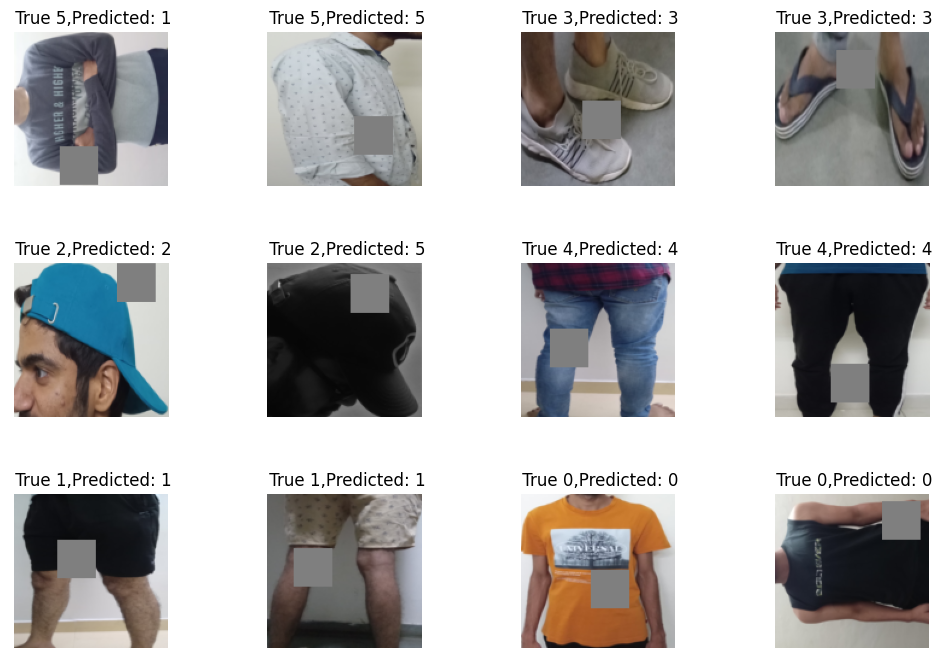

In [ ]:
num_rows, num_cols = 3, 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, data in enumerate(test_dataloader):
    img, label = data
    img = apply_random_black_mask(img)
    output = net(img.cuda())
    _,predicted = torch.max(output, 1)

    img_np = img.squeeze().permute(1, 2, 0).numpy()  # Permute the channels to (height, width, channels)
    img_np = img_np/2+0.5

    # Determine the subplot location in the grid
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Plot the image in the corresponding subplot
    ax = axes[row_idx, col_idx]
    ax.imshow(img_np)
    ax.set_title(f" True {label.item()},Predicted: {predicted.item()}")
    ax.axis('off')


**Conclusion**: Since the model is quite well trained and test dataset is quite small, we are not seeing any decrease in accuracy on test dataset here. But it may decrease on large dataset, as we know some data loss is there when masking is done. So, lets try to do some changes in our model.

###**Approach 1**: Train a new CNN model with masked training dataset

In [ ]:
masked_net = CNN().cuda()

In [ ]:
def masked_train(train_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    masked_net.train()
    for i, data_ in enumerate(train_dataloader, 0):
        img, label = data_
        img = apply_random_black_mask(img)
        img ,label = img.cuda(),label.cuda()

        optimizer.zero_grad()
        output = masked_net(img)
        loss_CrossEntropy = criterion(output, label)
        loss_CrossEntropy.backward()
        optimizer.step()
        loss.append(loss_CrossEntropy.item())

    loss = np.array(loss)
    return loss.mean() / len(train_dataloader)


In [ ]:
def masked_validate(val_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    masked_net.eval()
    for i, data_ in enumerate(val_dataloader, 0):
        img, label = data_
        img = apply_random_black_mask(img)
        img, label = img.cuda(), label.cuda()

        output = masked_net(img)
        loss_CrossEntropy = criterion(output, label)
        loss.append(loss_CrossEntropy.item())

    loss = np.array(loss)
    return loss.mean() / len(val_dataloader)


In [ ]:
def masked_test(test_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    masked_net.eval()
    for i, data_ in enumerate(test_dataloader, 0):
        img, label = data_
        img = apply_random_black_mask(img)
        img, label = img.cuda(), label.cuda()

        output = masked_net(img)
        loss_CrossEntropy = criterion(output, label)
        loss.append(loss_CrossEntropy.item())

    loss = np.array(loss)
    return loss.mean() / len(test_dataloader)


In [ ]:
def calculate_accuracy(output, target):
    _, predicted = torch.max(output, 1)
    correct = (predicted == target).sum().item()
    accuracy = correct / target.size(0)
    return accuracy

In [ ]:
model_dict_path = '/content/drive/MyDrive/MensWear/Classification_Model_masked.pth'
training_acc=[]
training_loss=[]
validation_acc=[]
validation_loss=[]
testing_acc=[]
testing_loss=[]
best_val_loss = 9999
for epoch in range(1,31):
  train_loss = masked_train(train_dataloader)
  training_loss.append(train_loss)
  # Calculate accuracy on the training set
  masked_net.eval()  # Set the model to evaluation mode
  train_accuracy = 0.0
  with torch.no_grad():
      for i, data_ in enumerate(train_dataloader, 0):
          img, label = data_
          img = apply_random_black_mask(img)
          img, label = img.cuda(), label.cuda()
          output = masked_net(img)
          train_accuracy += calculate_accuracy(output, label)
  train_accuracy /= len(train_dataloader)
  training_acc.append(train_accuracy)
  # Calculate accuracy on the validation set
  val_loss = 0.0
  val_accuracy = 0.0
  with torch.no_grad():
      for i, data_ in enumerate(val_dataloader, 0):
          img, label = data_
          img = apply_random_black_mask(img)
          img, label = img.cuda(), label.cuda()
          output = masked_net(img)
          val_accuracy += calculate_accuracy(output, label)
  val_accuracy /= len(val_dataloader)
  validation_acc.append(val_accuracy)
  val_loss = masked_validate(val_dataloader)
  validation_loss.append(val_loss)

  test_loss = 0.0
  test_accuracy = 0.0
  with torch.no_grad():
      for i, data_ in enumerate(test_dataloader, 0):
          img, label = data_
          img = apply_random_black_mask(img)
          img, label = img.cuda(), label.cuda()
          output = masked_net(img)
          test_accuracy += calculate_accuracy(output, label)
  test_accuracy /= len(test_dataloader)
  testing_acc.append(test_accuracy)
  test_loss = masked_test(test_dataloader)
  testing_loss.append(test_loss)
  print(f"Epoch:{epoch} | Training loss:{train_loss:.4f} | Training accuracy:{train_accuracy:.4f} | Validation loss:{val_loss:.4f}| Validation accuracy:{val_accuracy:.4f} | Testing loss:{test_loss:.4f} | Testing accuracy:{test_accuracy:.4f}")

  if val_loss<best_val_loss:
    best_val_loss = val_loss
    print("-"*10)
    print(f"Best Eval loss{best_val_loss}")
    torch.save(masked_net.state_dict(), model_dict_path)
    print("Model Saved Successfully")



Epoch:1 | Training loss:0.1634 | Training accuracy:0.2023 | Validation loss:0.8923| Validation accuracy:0.2344 | Testing loss:0.1495 | Testing accuracy:0.1667
----------
Best Eval loss0.8923066258430481
Model Saved Successfully
Epoch:2 | Training loss:0.1636 | Training accuracy:0.2032 | Validation loss:0.8929| Validation accuracy:0.2656 | Testing loss:0.1495 | Testing accuracy:0.1667
Epoch:3 | Training loss:0.1635 | Training accuracy:0.2032 | Validation loss:0.8920| Validation accuracy:0.2344 | Testing loss:0.1494 | Testing accuracy:0.1667
----------
Best Eval loss0.8920170962810516
Model Saved Successfully
Epoch:4 | Training loss:0.1632 | Training accuracy:0.1939 | Validation loss:0.8937| Validation accuracy:0.2656 | Testing loss:0.1494 | Testing accuracy:0.1667
Epoch:5 | Training loss:0.1634 | Training accuracy:0.1913 | Validation loss:0.8945| Validation accuracy:0.2969 | Testing loss:0.1494 | Testing accuracy:0.2500
Epoch:6 | Training loss:0.1637 | Training accuracy:0.2087 | Validat

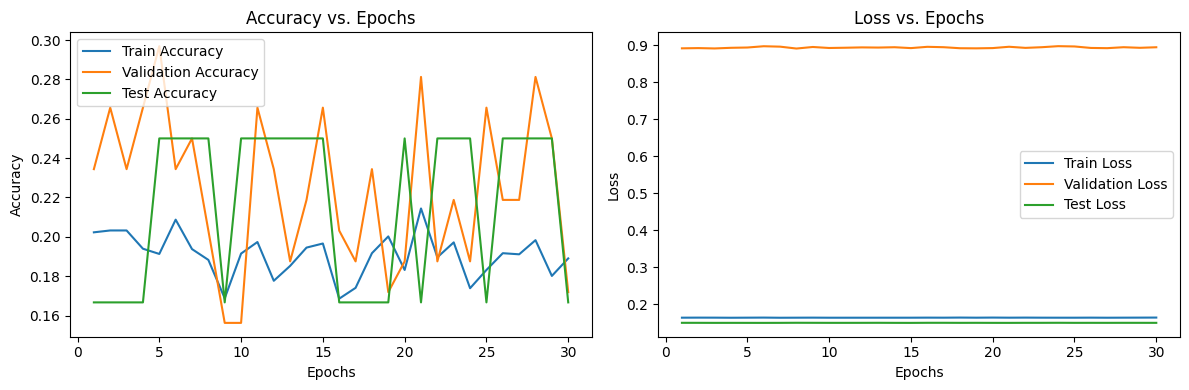

In [ ]:
# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 31), training_acc, label='Train Accuracy')
plt.plot(range(1, 31), validation_acc, label='Validation Accuracy')
plt.plot(range(1, 31), testing_acc, label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 31), training_loss, label='Train Loss')
plt.plot(range(1, 31), validation_loss, label='Validation Loss')
plt.plot(range(1, 31), testing_loss, label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()


**Observation on approach1**: The model is unable to learn anything on masked dataset.

###**Approach 2**: Instead of training a new model on masked dataset, let's try to train the initial model (which we trained on un-masked dataset) further with masked dataset.

In [ ]:
with open('/content/drive/MyDrive/MensWear/Classification_Model.pkl', 'rb') as f:
    masked_net = pickle.load(f)
# Declare Optimizer
optimizer = torch.optim.Adam(net.parameters(), lr = 1e-4, weight_decay=0.0005)
scheduler = ExponentialLR(optimizer, gamma=0.9)

**Note:** We changed optimizer as well from SGD to Adams, also scheduler will also be used. This we thought to do after observing the inability of model to learn the masked dataset in approach1.

In [ ]:
model_dict_path = '/content/drive/MyDrive/MensWear/Classification_Model_masked_modified.pth'
training_acc=[]
training_loss=[]
validation_acc=[]
validation_loss=[]
testing_acc=[]
testing_loss=[]
best_val_loss = 9999
for epoch in range(1,31):
  train_loss = masked_train(train_dataloader)
  training_loss.append(train_loss)
  # Calculate accuracy on the training set
  masked_net.eval()  # Set the model to evaluation mode
  train_accuracy = 0.0
  with torch.no_grad():
      for i, data_ in enumerate(train_dataloader, 0):
          img, label = data_
          img = apply_random_black_mask(img)
          img, label = img.cuda(), label.cuda()
          output = masked_net(img)
          train_accuracy += calculate_accuracy(output, label)
  train_accuracy /= len(train_dataloader)
  training_acc.append(train_accuracy)
  # Calculate accuracy on the validation set
  val_loss = 0.0
  val_accuracy = 0.0
  with torch.no_grad():
      for i, data_ in enumerate(val_dataloader, 0):
          img, label = data_
          img = apply_random_black_mask(img)
          img, label = img.cuda(), label.cuda()
          output = masked_net(img)
          val_accuracy += calculate_accuracy(output, label)
  val_accuracy /= len(val_dataloader)
  validation_acc.append(val_accuracy)
  val_loss = masked_validate(val_dataloader)
  validation_loss.append(val_loss)

  test_loss = 0.0
  test_accuracy = 0.0
  with torch.no_grad():
      for i, data_ in enumerate(test_dataloader, 0):
          img, label = data_
          img = apply_random_black_mask(img)
          img, label = img.cuda(), label.cuda()
          output = masked_net(img)
          test_accuracy += calculate_accuracy(output, label)
  test_accuracy /= len(test_dataloader)
  testing_acc.append(test_accuracy)
  test_loss = masked_test(test_dataloader)
  testing_loss.append(test_loss)
  print(f"Epoch:{epoch} | Training loss:{train_loss:.4f} | Training accuracy:{train_accuracy:.4f} | Validation loss:{val_loss:.4f}| Validation accuracy:{val_accuracy:.4f} | Testing loss:{test_loss:.4f} | Testing accuracy:{test_accuracy:.4f}")
  scheduler.step()
  if val_loss<best_val_loss:
    best_val_loss = val_loss
    print("-"*10)
    print(f"Best Eval loss{best_val_loss}")
    torch.save(masked_net.state_dict(), model_dict_path)
    print("Model Saved Successfully")



Epoch:1 | Training loss:0.0234 | Training accuracy:0.9432 | Validation loss:0.3118| Validation accuracy:0.6562 | Testing loss:0.0298 | Testing accuracy:0.7500
----------
Best Eval loss0.3118376284837723
Model Saved Successfully
Epoch:2 | Training loss:0.0223 | Training accuracy:0.9259 | Validation loss:0.3864| Validation accuracy:0.6719 | Testing loss:0.0594 | Testing accuracy:0.8333
Epoch:3 | Training loss:0.0221 | Training accuracy:0.9343 | Validation loss:0.3371| Validation accuracy:0.7500 | Testing loss:0.0334 | Testing accuracy:0.8333
Epoch:4 | Training loss:0.0224 | Training accuracy:0.9545 | Validation loss:0.3163| Validation accuracy:0.7812 | Testing loss:0.0510 | Testing accuracy:0.8333
Epoch:5 | Training loss:0.0265 | Training accuracy:0.9369 | Validation loss:0.4209| Validation accuracy:0.7344 | Testing loss:0.0192 | Testing accuracy:0.8333
Epoch:6 | Training loss:0.0275 | Training accuracy:0.9430 | Validation loss:0.4050| Validation accuracy:0.7031 | Testing loss:0.0232 | T

In [ ]:
torch.save(masked_net.state_dict(), model_dict_path)
print("Model Saved Successfully")

Model Saved Successfully


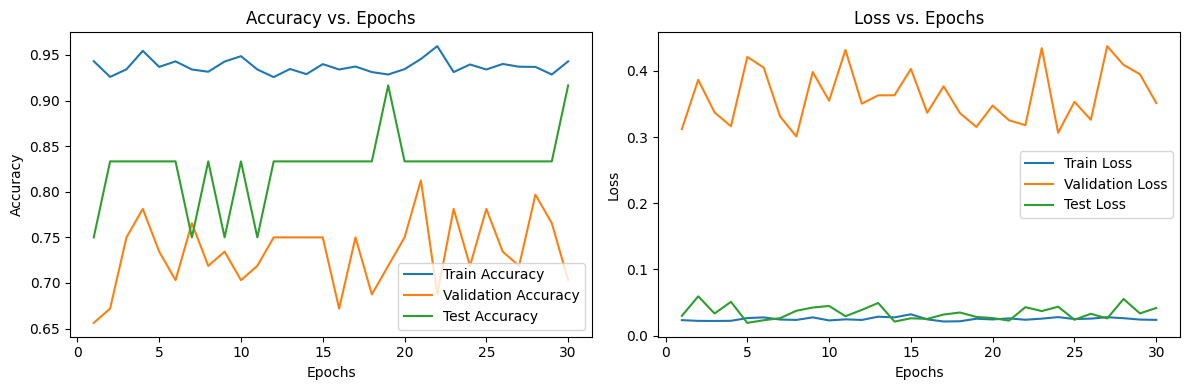

In [ ]:
# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 31), training_acc, label='Train Accuracy')
plt.plot(range(1, 31), validation_acc, label='Validation Accuracy')
plt.plot(range(1, 31), testing_acc, label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 31), training_loss, label='Train Loss')
plt.plot(range(1, 31), validation_loss, label='Validation Loss')
plt.plot(range(1, 31), testing_loss, label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()


**Observations**: This time the model we used was already a trained model, which we further trained on masked dataset. Therefore accuracies and losses didn't changed much. Hence , the graph looks quite horizontal. But we were able to increase the performance (Accuracy) from 83.33% to 91.67% on testing dataset.

####Saving the model

In [ ]:
classification_model_path='/content/drive/MyDrive/MensWear/Classification_Model_masked_modified.pkl'
model_dict_path = '/content/drive/MyDrive/MensWear/Classification_Model_masked_modified.pth'

masked_model = CNN().to(device)
# Load the saved state dictionary
state_dict = torch.load(model_dict_path)
# Load the state dictionary into the model
masked_model.load_state_dict(state_dict)
with open(classification_model_path, 'wb') as f:
    pickle.dump(masked_model, f)

print("Model saved as .pkl successfully.")

Model saved as .pkl successfully.


In [ ]:
test_accuracy = 0.0
with torch.no_grad():
    for i, data_ in enumerate(test_dataloader, 0):
        img, label = data_
        img = apply_random_black_mask(img)
        img, label = img.cuda(), label.cuda()
        output = masked_net(img)
        test_accuracy += calculate_accuracy(output, label)
test_accuracy /= len(test_dataloader)
test_accuracy

0.9166666666666666

####Visual results of model predictions on masked dataset

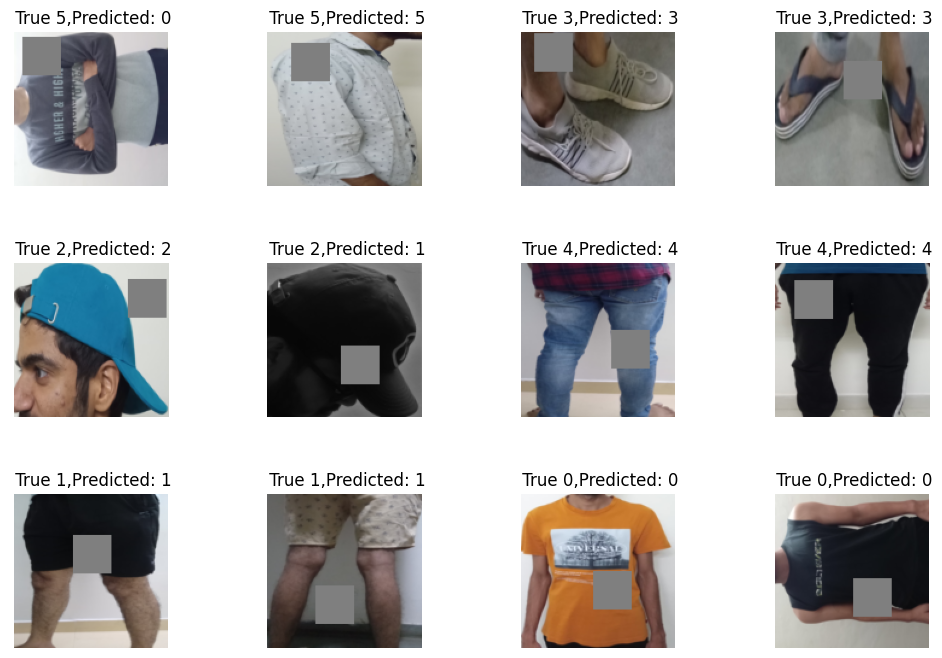

In [ ]:
num_rows, num_cols = 3, 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Assuming you have properly defined and loaded the test_dataloader

# Iterate through the test DataLoader
for i, data in enumerate(test_dataloader):
    img, label = data
    img = apply_random_black_mask(img)
    output = masked_net(img.cuda())
    _,predicted = torch.max(output, 1)

    img_np = img.squeeze().permute(1, 2, 0).numpy()  # Permute the channels to (height, width, channels)
    img_np = img_np/2+0.5

    # Determine the subplot location in the grid
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Plot the image in the corresponding subplot
    ax = axes[row_idx, col_idx]
    ax.imshow(img_np)
    ax.set_title(f" True {label.item()},Predicted: {predicted.item()}")
    ax.axis('off')






